In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
import os

if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
    
plt.rc("axes", unicode_minus=False)

In [4]:
tg200_df = pd.read_csv(r'C:\Users\haech\toyproject\App_analysis\applestore_crawler\top_grossing200_20201207.csv')
tp200_df = pd.read_csv(r'C:\Users\haech\toyproject\App_analysis\applestore_crawler\top_paid200_20201207.csv')

In [6]:
topfree_df = pd.read_csv(r'C:\Users\haech\toyproject\App_analysis\applestore_crawler\topfree_category200_20201208.csv')
topgrossing_df = pd.read_csv(r'C:\Users\haech\toyproject\App_analysis\applestore_crawler\topgrossing_cate_20201209.csv')

In [9]:
df = topgrossing_df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997 entries, 0 to 3996
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3997 non-null   object 
 1   developer      3997 non-null   object 
 2   app_size(MB)   3988 non-null   object 
 3   category_code  3997 non-null   int64  
 4   category       3997 non-null   object 
 5   genre(Games)   172 non-null    object 
 6   review_num     3481 non-null   float64
 7   review_score   3481 non-null   float64
 8   version        3794 non-null   float64
 9   lang           3900 non-null   object 
 10  lang_num       3900 non-null   float64
 11  pricing        3997 non-null   object 
 12  price(won)     3997 non-null   int64  
 13  release_year   3997 non-null   int64  
 14  app_url        3997 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 468.5+ KB


In [41]:
df["category"].value_counts()

Lifestyle            200
Business             200
News                 200
Photo & Video        200
Finance              200
Social Networking    200
Entertainment        200
Productivity         200
Books                200
Travel               200
Navigation           200
Weather              200
Sports               200
Music                200
Health & Fitness     200
Utilities            200
Medical              200
Games                199
Food & Drink         199
Education            199
Name: category, dtype: int64

In [48]:
df.columns

Index(['title', 'developer', 'app_size(MB)', 'category_code', 'category',
       'genre(Games)', 'review_num', 'review_score', 'version', 'lang',
       'lang_num', 'pricing', 'price(won)', 'release_year', 'app_url'],
      dtype='object')

## 전체 3,997개 앱 중 무료 앱은 3,157개 / 유료 앱은 840개

free    3157
paid     840
Name: pricing, dtype: int64


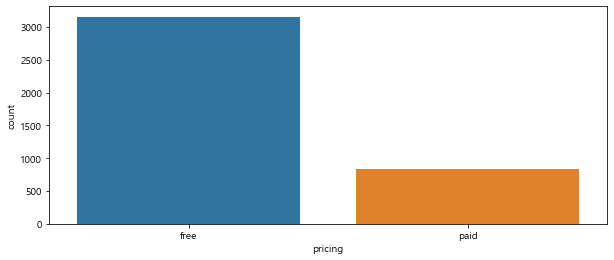

In [58]:
# 무료/유료 앱 - 카테고리 비중
print(df["pricing"].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="pricing")

## 무료 앱의 비중은 '게임'과 '소셜 네트워킹' 카테고리가 가장 크다
## 유료 앱의 비중은 '식음료'와 '날씨' 카테고리가 가장 크다

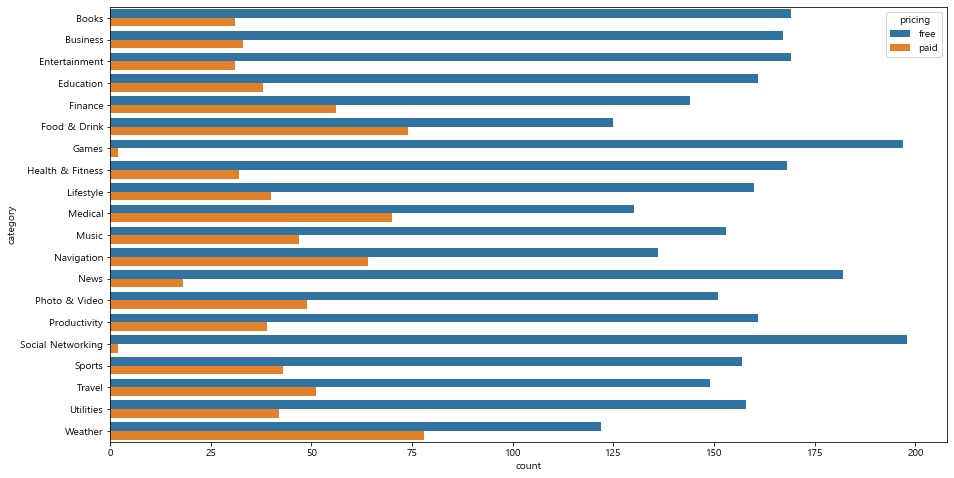

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, y="category", hue="pricing")

## 전체 앱 평점의 평균값은 4.1
## 리뷰 평점 평균값은 무료 앱(4.1)이 유료 앱(4.0)보다 더 높다
## 유료 앱의 평균가격은 12,781원이다

In [75]:
# 전체 앱 평균 평점/카테고리별 평균 평점/평점 분포

print("전체 앱 평균 평점: ", df["review_score"].mean())
group_price = df.groupby(df["pricing"]).mean().reset_index()
group_price

전체 앱 평균 평점:  4.129646653260551


,pricing,category_code,review_num,review_score,version,lang_num,price(won),release_year
0,free,6010.401330,3355.256051,4.136514,10.239012,8.004547,0.000000,2015.758315
1,paid,6010.844048,501.157143,4.098571,9.982609,6.381242,12781.309524,2014.261905


In [84]:
group_cate = df.groupby(["pricing", "category"]).mean().reset_index()
group_cate

,pricing,category,category_code,review_num,review_score,version,lang_num,price(won),release_year
0,free,Books,6018.0,342.546667,3.902667,9.650602,3.881988,0.000000,2015.644970
1,free,Business,6000.0,1329.973856,4.107843,10.704605,10.222892,0.000000,2016.760479
2,free,Education,6017.0,1813.101266,4.104430,10.172152,7.869565,0.000000,2016.049689
3,free,Entertainment,6018.0,342.546667,3.902667,9.650602,3.881988,0.000000,2015.644970
4,free,Finance,6015.0,473.032787,4.311475,10.262590,5.774648,0.000000,2015.541667
5,free,Food & Drink,6023.0,129.800000,4.602222,10.161290,3.750000,0.000000,2014.760000
6,free,Games,6014.0,17169.010152,4.159898,9.356345,6.356021,0.000000,2017.974619
7,free,Health & Fitness,6013.0,2547.438272,4.329630,10.913855,10.101190,0.000000,2016.196429
8,free,Lifestyle,6012.0,2131.086093,3.986755,10.474051,8.381250,0.000000,2017.156250
9,free,Medical,6020.0,412.270833,4.083333,10.095238,6.384615,0.000000,2015.100000


Text(0.5, 1.0, '유/무료 카테고리별 앱 평점 평균')

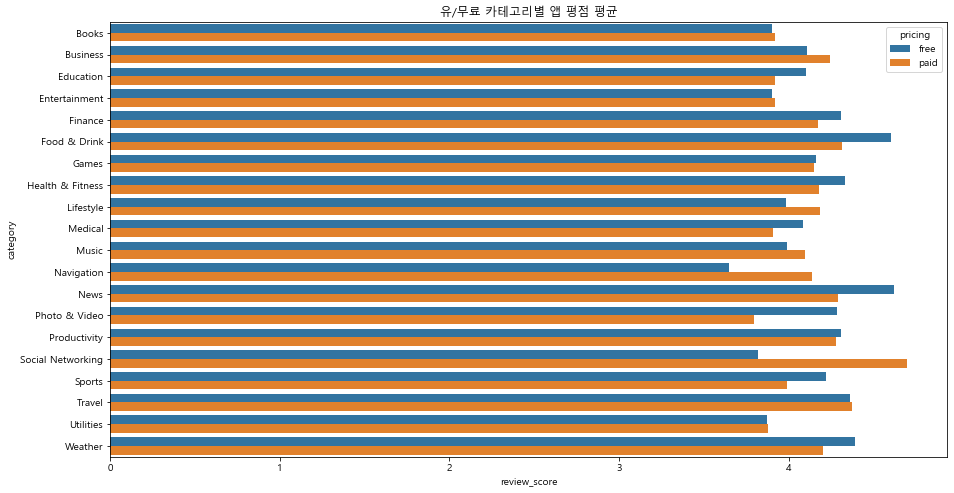

In [88]:
plt.figure(figsize=(15,8))
sns.barplot(data=group_cate, y="category", x="review_score", hue="pricing")
plt.title("유/무료 카테고리별 앱 평점 평균")

In [94]:
# 게임 카테고리의 경우, 가장 인기있는 장르

df_games = df[df["category"] == "Games"]
df_games.columns

Index(['title', 'developer', 'app_size(MB)', 'category_code', 'category',
       'genre(Games)', 'review_num', 'review_score', 'version', 'lang',
       'lang_num', 'pricing', 'price(won)', 'release_year', 'app_url'],
      dtype='object')

## "Games" 카테고리 내 장르별 게임 수를 살펴보면, 롤플레잉이 1위, 전략이 2위, 어드벤처가 3위 순으로 많이 차지하고 있다. --> 가장 인기 있는 장르는 롤플레잉이다.
## 가장 적은 장르는 캐주얼과 레이싱이다.

In [163]:
genre_score = df_games["genre(Games)"].value_counts(normalize=True).tolist()
genre_score

[0.28488372093023256,
 0.1744186046511628,
 0.1569767441860465,
 0.08139534883720931,
 0.08139534883720931,
 0.05813953488372093,
 0.040697674418604654,
 0.03488372093023256,
 0.023255813953488372,
 0.01744186046511628,
 0.01744186046511628,
 0.01744186046511628,
 0.005813953488372093,
 0.005813953488372093]

In [180]:
genre_names = df_games.groupby(["genre(Games)"]).count().sort_values(by="title", ascending=False).index.tolist()
genre_names

['롤플레잉',
 '전략',
 '어드벤처',
 '스포츠',
 '퍼즐',
 '카드',
 '시뮬레이션',
 '액션',
 '음악',
 '가족',
 '보드',
 '카지노',
 '레이싱',
 '캐주얼']

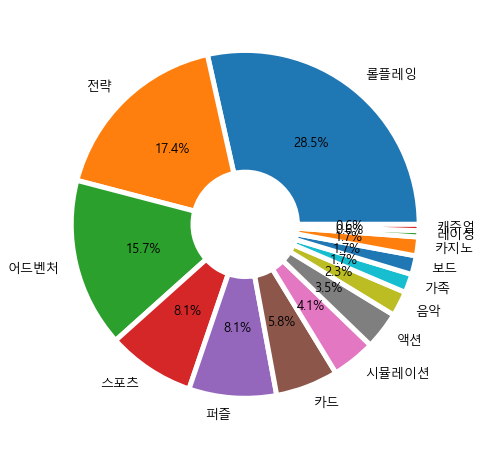

In [189]:
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 13
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
x = plt.pie(data=genre_score, x=genre_score, labels=genre_names, autopct='%.1f%%', wedgeprops=wedgeprops)

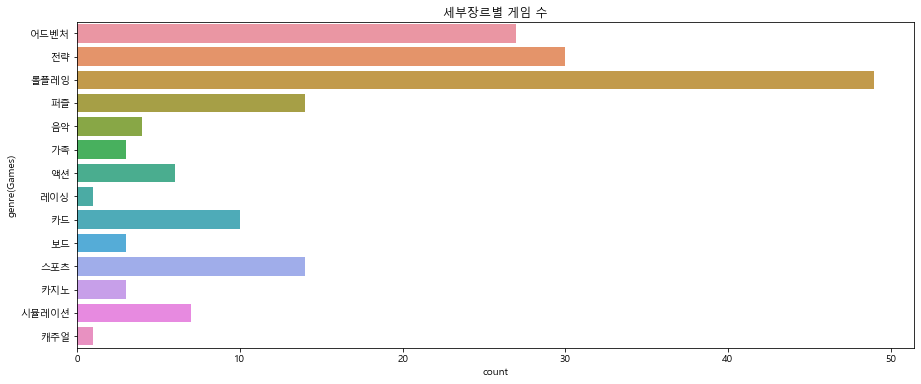

In [104]:
plt.figure(figsize=(15,6))
plt.title("세부장르별 게임 수")
x = sns.countplot(data=df_games, y="genre(Games)")

## "Games"카테고리에서 대부분은 무료게임이다.(199개 중 유료게임 2개)

free    197
paid      2
Name: pricing, dtype: int64


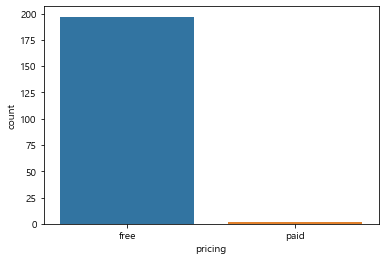

In [109]:
print(df_games["pricing"].value_counts())
y = sns.countplot(data=df_games, x="pricing")

## 세부장르별 리뷰평점은 가족, 퍼즐, 액션, 어드벤처, 캐주얼 순으로 높았으며, 14개 장르 중 11개 장르의 평균 리뷰평점은 게임 앱 평균 리뷰평점(4.15)보다 높다.

게임 앱 평균 리뷰평점: 4.159798994974876


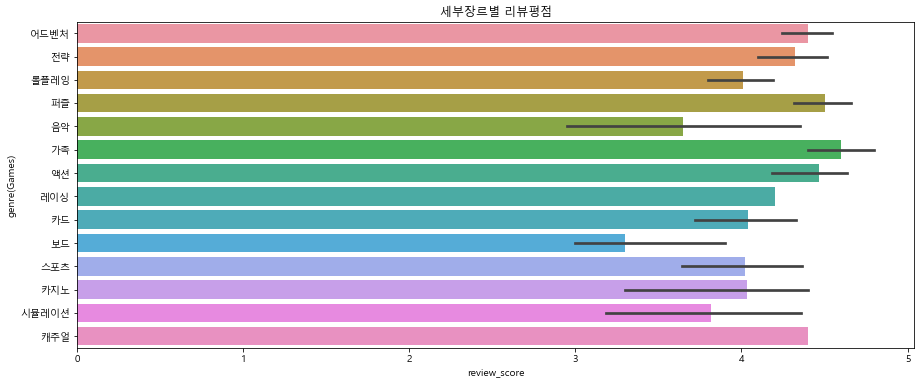

In [116]:
print("게임 앱 평균 리뷰평점:", df_games["review_score"].mean())
plt.figure(figsize=(15,6))
plt.title("세부장르별 리뷰평점")
x = sns.barplot(data=df_games, x="review_score", y="genre(Games)")

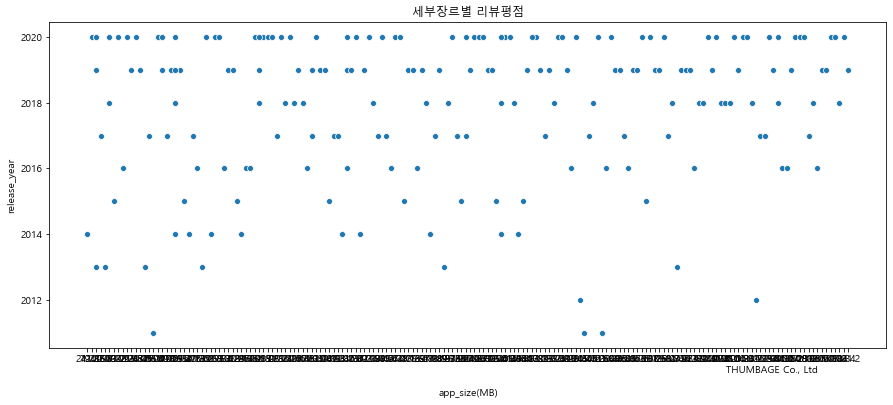

In [137]:
plt.figure(figsize=(15,6))
plt.title("세부장르별 리뷰평점")
x = sns.scatterplot(data=df_games, x="app_size(MB)", y="release_year")

In [ ]:
# 앱 크기 - 평점 간의 상관관계/리뷰 수 - 평점 간의 상관관계

In [ ]:
# 유료 앱 - 가격대별 앱 분포, 카테고리별 비중, 카테고리별 앱 가격

In [ ]:
# 출시연도별 앱 카테고리 비중(어떤 카테고리에 장수/신규 앱들이 많은지)

In [ ]:
# 리뷰 수가 특정기준 이상인 앱들 - 평점/가격/카테고리 비중과의 상관관계